# Decision Tree

In [1]:
data('iris')

In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# 1. Data Partition

In [4]:
set.seed(555)

In [6]:
ind <- sample(2,nrow(iris),
             replace = TRUE,
             prob = c(0.8,0.2))

In [7]:
train  <- iris[ind==1,]

In [8]:
test <- iris[ind==2,]

In [9]:
dim(train)

[1] 118   5

In [11]:
dim(test)

[1] 32  5

In [12]:
library(party)

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"

In [13]:
tree<- ctree(Species~.,train)

In [14]:
tree


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  118 

1) Petal.Length <= 1.9; criterion = 1, statistic = 110.067
  2)*  weights = 42 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 50.039
    4) Petal.Length <= 4.8; criterion = 0.998, statistic = 12.36
      5)*  weights = 35 
    4) Petal.Length > 4.8
      6)*  weights = 7 
  3) Petal.Width > 1.7
    7)*  weights = 34 

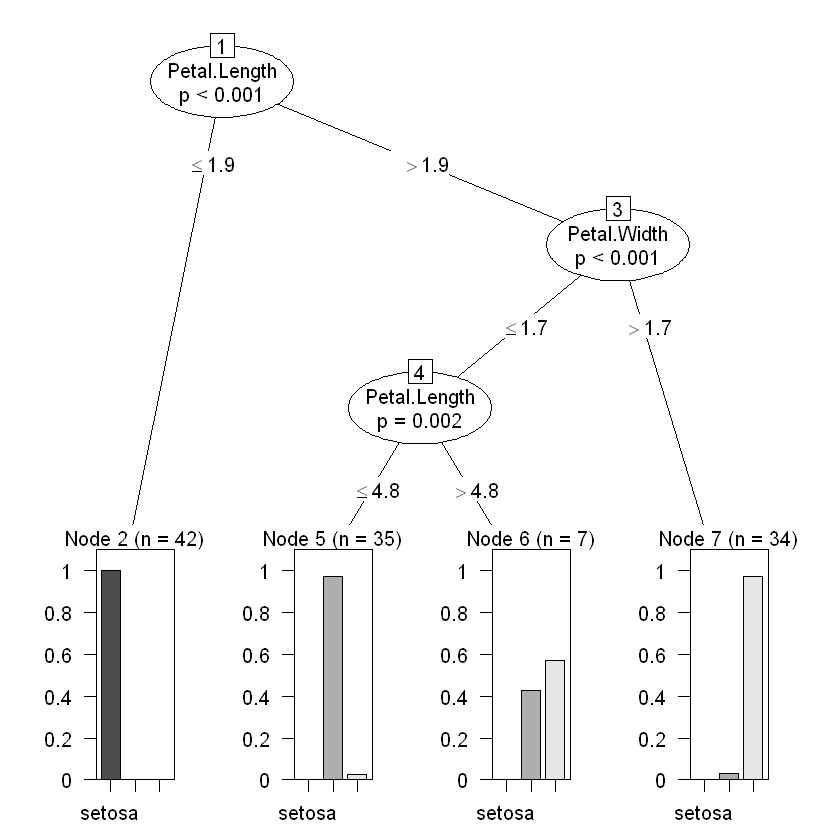

In [15]:
plot(tree)

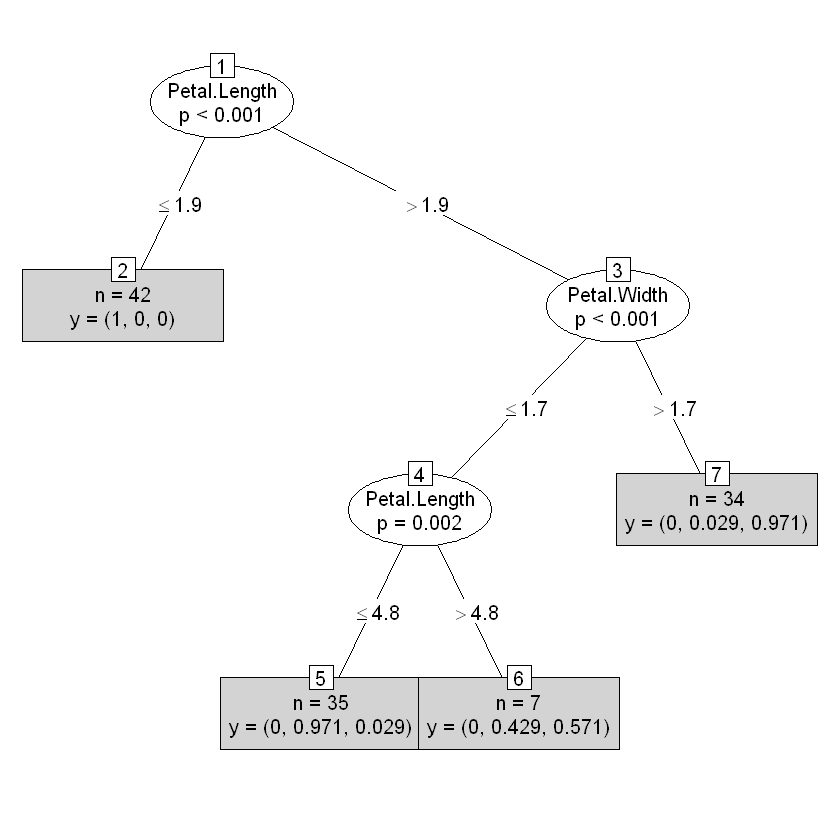

In [16]:
plot(tree,type= 'simple')

# Continuous Variable

In [17]:
tree1 <- ctree(Sepal.Length~.,train)

In [18]:
tree1


	 Conditional inference tree with 7 terminal nodes

Response:  Sepal.Length 
Inputs:  Sepal.Width, Petal.Length, Petal.Width, Species 
Number of observations:  118 

1) Petal.Length <= 4.2; criterion = 1, statistic = 91.667
  2) Petal.Length <= 3.3; criterion = 1, statistic = 26.444
    3) Sepal.Width <= 3.2; criterion = 1, statistic = 18.176
      4)*  weights = 17 
    3) Sepal.Width > 3.2
      5) Sepal.Width <= 3.7; criterion = 0.981, statistic = 7.98
        6)*  weights = 20 
      5) Sepal.Width > 3.7
        7)*  weights = 7 
  2) Petal.Length > 3.3
    8)*  weights = 15 
1) Petal.Length > 4.2
  9) Petal.Length <= 5.6; criterion = 1, statistic = 34.579
    10) Sepal.Width <= 3; criterion = 0.967, statistic = 6.981
      11)*  weights = 31 
    10) Sepal.Width > 3
      12)*  weights = 12 
  9) Petal.Length > 5.6
    13)*  weights = 16 

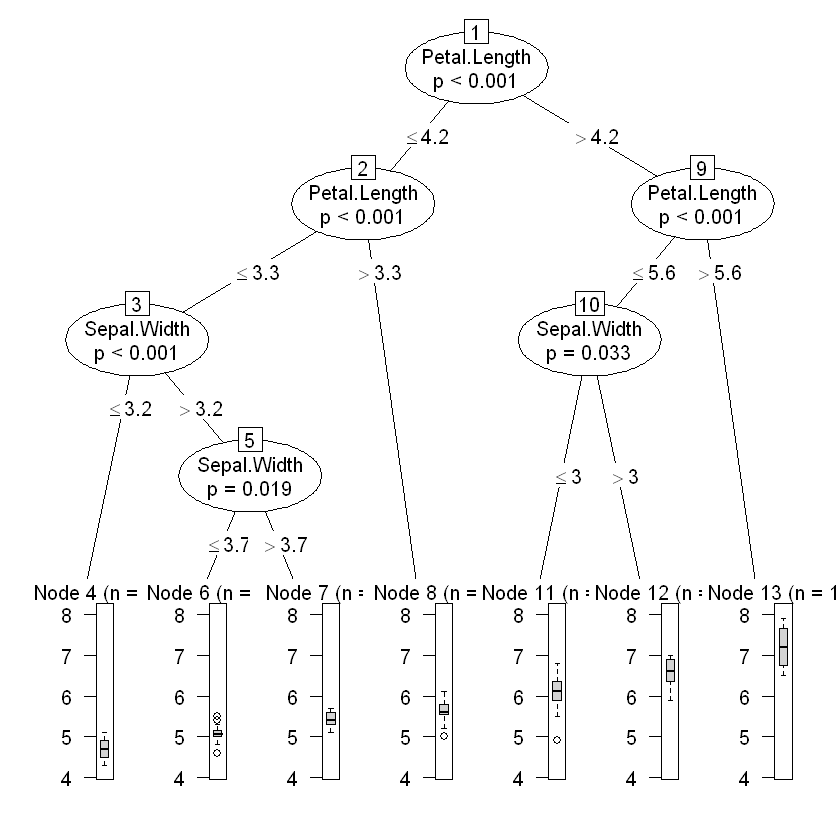

In [19]:
plot(tree1)

In [20]:
tree2 <- ctree(Sepal.Length~.,train,
              controls = ctree_control(mincriterion = 0.9999,
                                      minsplit = 6))

In [21]:
tree2


	 Conditional inference tree with 5 terminal nodes

Response:  Sepal.Length 
Inputs:  Sepal.Width, Petal.Length, Petal.Width, Species 
Number of observations:  118 

1) Petal.Length <= 4.2; criterion = 1, statistic = 91.667
  2) Petal.Length <= 3.3; criterion = 1, statistic = 26.444
    3) Sepal.Width <= 3.2; criterion = 1, statistic = 18.176
      4)*  weights = 17 
    3) Sepal.Width > 3.2
      5)*  weights = 27 
  2) Petal.Length > 3.3
    6)*  weights = 15 
1) Petal.Length > 4.2
  7) Petal.Length <= 5.6; criterion = 1, statistic = 34.579
    8)*  weights = 43 
  7) Petal.Length > 5.6
    9)*  weights = 16 

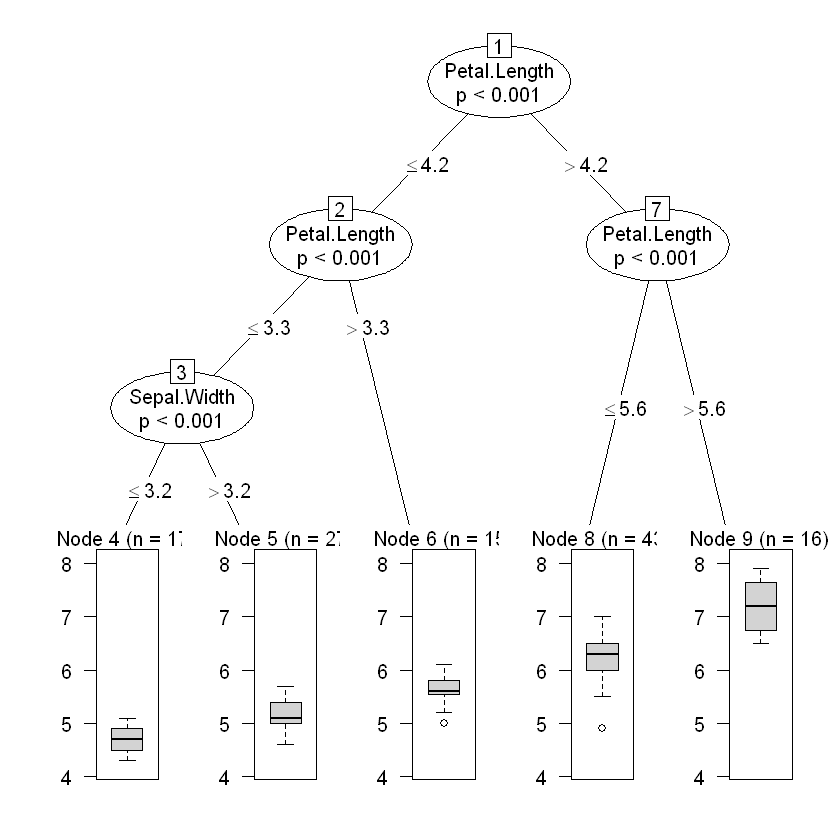

In [22]:
plot(tree2)

# Prediction and Mis-Classification Error

In [23]:
predict(tree1,train)

Sepal.Length
5.070000
4.700000
4.700000
5.070000
5.428571
5.070000
4.700000
5.070000
4.700000
4.700000


In [24]:
predict(tree,train)

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] versicolor versicolor virginica  versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] virginica  versicolor virginica  versicolor versicolor versicolor
 [67] virginica  versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor virginica  virginica  virginica  versicolor
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica  virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [25]:
predict(tree,test)

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     versicolor versicolor versicolor versicolor
[13] versicolor versicolor virginica  versicolor versicolor versicolor
[19] versicolor versicolor virginica  virginica  virginica  virginica 
[25] virginica  virginica  virginica  virginica  virginica  virginica 
[31] virginica  virginica 
Levels: setosa versicolor virginica

In [26]:
predict(tree,test,extra=1)

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     versicolor versicolor versicolor versicolor
[13] versicolor versicolor virginica  versicolor versicolor versicolor
[19] versicolor versicolor virginica  virginica  virginica  virginica 
[25] virginica  virginica  virginica  virginica  virginica  virginica 
[31] virginica  virginica 
Levels: setosa versicolor virginica

In [27]:
predict(tree,test,type = 'prob')

[[1]]
[1] 1 0 0

[[2]]
[1] 1 0 0

[[3]]
[1] 1 0 0

[[4]]
[1] 1 0 0

[[5]]
[1] 1 0 0

[[6]]
[1] 1 0 0

[[7]]
[1] 1 0 0

[[8]]
[1] 1 0 0

[[9]]
[1] 0.00000000 0.97142857 0.02857143

[[10]]
[1] 0.00000000 0.97142857 0.02857143

[[11]]
[1] 0.00000000 0.97142857 0.02857143

[[12]]
[1] 0.00000000 0.97142857 0.02857143

[[13]]
[1] 0.00000000 0.97142857 0.02857143

[[14]]
[1] 0.00000000 0.97142857 0.02857143

[[15]]
[1] 0.0000000 0.4285714 0.5714286

[[16]]
[1] 0.00000000 0.97142857 0.02857143

[[17]]
[1] 0.00000000 0.97142857 0.02857143

[[18]]
[1] 0.00000000 0.97142857 0.02857143

[[19]]
[1] 0.00000000 0.97142857 0.02857143

[[20]]
[1] 0.00000000 0.97142857 0.02857143

[[21]]
[1] 0.00000000 0.02941176 0.97058824

[[22]]
[1] 0.00000000 0.02941176 0.97058824

[[23]]
[1] 0.00000000 0.02941176 0.97058824

[[24]]
[1] 0.00000000 0.02941176 0.97058824

[[25]]
[1] 0.00000000 0.02941176 0.97058824

[[26]]
[1] 0.00000000 0.02941176 0.97058824

[[27]]
[1] 0.00000000 0.02941176 0.97058824

[[28]]
[1] 0.00000000 0.02941176 0.97058824

[[29]]
[1] 0.00000000 0.02941176 0.97058824

[[30]]
[1] 0.00000000 0.02941176 0.97058824

[[31]]
[1] 0.00000000 0.02941176 0.97058824

[[32]]
[1] 0.00000000 0.02941176 0.97058824

In [28]:
p1 <- predict(tree,train)

In [29]:
p1

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] versicolor versicolor virginica  versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] virginica  versicolor virginica  versicolor versicolor versicolor
 [67] virginica  versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor virginica  virginica  virginica  versicolor
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica  virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [30]:
tab1 <- table(p1,train$Species)

In [31]:
tab1

            
p1           setosa versicolor virginica
  setosa         42          0         0
  versicolor      0         34         1
  virginica       0          4        37

In [33]:
tab2 <- table(Predicted = p1,Actual = train$Species)

In [34]:
tab2

            Actual
Predicted    setosa versicolor virginica
  setosa         42          0         0
  versicolor      0         34         1
  virginica       0          4        37

In [35]:
  1 - sum(diag(tab1))/sum(tab1)

[1] 0.04237288

In [36]:
p3 <- predict(tree,test)

In [37]:
p3

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     versicolor versicolor versicolor versicolor
[13] versicolor versicolor virginica  versicolor versicolor versicolor
[19] versicolor versicolor virginica  virginica  virginica  virginica 
[25] virginica  virginica  virginica  virginica  virginica  virginica 
[31] virginica  virginica 
Levels: setosa versicolor virginica

In [38]:
tab2 <- table(Predicted = p3, Actual = test$Species)

In [39]:
tab2

            Actual
Predicted    setosa versicolor virginica
  setosa          8          0         0
  versicolor      0         11         0
  virginica       0          1        12

In [40]:
1 - sum(diag(tab2))/sum(tab2)

[1] 0.03125